## Introduction
Breast cancer is a prevalent cause of death, and it is the only type of cancer that is widespread among women worldwid. Many imaging techniques have been developed for early detection and treatment of breast cancer and to reduce the number of deaths, and many aided breast cancer diagnosis methods have been used to increase the diagnostic accuracy.

In the last few decades, several data mining and machine learning techniques have been developed for breast cancer detection and classification, which can be divided into three main stages: preprocessing, feature extraction, and classification. To facilitate interpretation and analysis, the preprocessing of mammography films helps improve the visibility of peripheral areas and intensity distribution, and several methods have been reported to assist in this process.

Feature extraction is an important step in breast cancer detection because it helps discriminate between benign and malignant tumors. After extraction, image properties such as smoothness, coarseness, depth, and regularity are extracted by segmentation

## Dataset Used for Research
In this work, Breast Cancer dataset was obtained from the UCI Machine Learning Repository. 

## Preprocessing
As a part of this research, processing was performed on the raw breast cancer data to scale the features using the Standard Scaler module. Standardization of datasets is a common requirement for many machine learning estimators. It transforms the attributes to a standard Gaussian distributions based on (xi–mean(x))/stdev(x) where stdev is the standard deviation. The Robust Scaler depends on the interquartile range to transform the features using (xi–Q1(x))/(Q3(x)–Q1(x)), where Q1, Q2, and Q3 represent quartiles. All the transformations used are included in scikit-learn machine learning library

## Features Selection
Usually, feature selection is applied as a preprocessing step before the actual learning. However, no algorithm can make good predictions without informative and discriminative features; therefore, to keep the most significant features and reduce the size of the dataset, we implemented Kernel PCA.

## Machine Learning Algorithms
For this research I have used KNN, SVM, KSVM, Decission Tree, Random Forest, Logistic Regression, XGBoost algorithms.

In [1]:
#!conda install scikit-learn
#!pip install numpy

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import plot_confusion_matrix


In [68]:
df =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv", delimiter=",") 

In [69]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [70]:
X = df.loc[:, df.columns != 'Classification']
y = df.loc[:, df.columns == 'Classification']

In [71]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.20, random_state=0)

In [74]:
print(X_trainset.shape)
print(y_trainset.shape)

(92, 9)
(92, 1)


In [75]:
print(X_testset.shape)
print(y_testset.shape)

(24, 9)
(24, 1)


In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainset = sc.fit_transform(X_trainset)
X_testset = sc.transform(X_testset)

# Dimension Reduction

In [77]:
# Applying LDA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA(n_components = 8)
#X_trainset = lda.fit_transform(X_trainset, y_trainset)
#X_testset = lda.transform(X_testset)

In [78]:
#X_testset

## Kernel PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In [79]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 7, kernel = 'rbf')
X_trainset = kpca.fit_transform(X_trainset)
X_testset = kpca.transform(X_testset)

In [80]:
X_testset

array([[-3.66677689e-01,  4.11907986e-01,  2.86369355e-01,
        -1.49276203e-01,  3.46771998e-02,  5.47984540e-02,
        -1.15963574e-02],
       [ 1.50588633e-01,  2.75806038e-01, -1.85293723e-01,
         8.05592805e-02, -1.41414694e-01,  1.72079406e-02,
         1.88896316e-01],
       [-3.75581157e-01, -2.10453063e-01,  2.41849087e-01,
         2.31393702e-01, -6.17271016e-03,  1.23649041e-01,
         1.09103025e-01],
       [-3.72864220e-01, -3.30335580e-01, -1.80892698e-01,
         3.70756686e-02,  2.58323452e-01, -9.70795239e-02,
         3.10139495e-03],
       [-3.51105913e-01,  9.10251010e-04, -2.97424104e-01,
        -5.95681290e-02, -8.31249211e-02, -3.36281335e-02,
         1.27596835e-01],
       [ 1.86311651e-01,  2.44399250e-01, -2.07441321e-01,
         1.01746090e-01,  3.69200984e-02,  2.48011196e-01,
         3.61673714e-02],
       [ 3.78192866e-01,  1.11133432e-01, -6.04547284e-02,
         2.15556870e-01, -1.65467225e-01, -2.02719304e-01,
         1.9353887

# Using KNN for classification

In [81]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_trainset, y_trainset)

# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
knn_acuracy = acuracy.mean()
knn_precision_score = precision_score(y_pred, y_testset)
knn_recall_score = recall_score(y_pred, y_testset)
knn_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array

In [82]:
print(knn_cm)
print(knn_precision_score)
print(knn_recall_score)
print(knn_f1_score)

[[ 7  4]
 [ 2 11]]
0.6363636363636364
0.7777777777777778
0.7000000000000001


KNN confusion matrix
[[ 7  4]
 [ 2 11]]


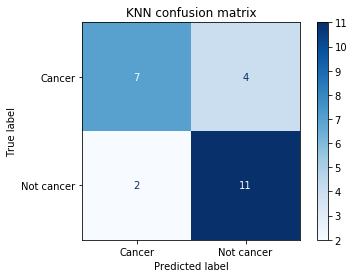

In [83]:
class_names = ["Cancer", "Not cancer"]
title = "KNN confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Using SVM for classification


In [84]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_trainset, y_trainset)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
svm_acuracy = acuracy.mean()
svm_precision_score = precision_score(y_pred, y_testset)
svm_recall_score = recall_score(y_pred, y_testset)
svm_f1_score = f1_score(y_pred, y_testset)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [86]:
svm_cm

array([[ 5,  6],
       [ 2, 11]])

In [87]:
print(svm_cm)
print(svm_precision_score)
print(svm_recall_score)
print(svm_f1_score)

[[ 5  6]
 [ 2 11]]
0.45454545454545453
0.7142857142857143
0.5555555555555556


SVM confusion matrix
[[ 5  6]
 [ 2 11]]


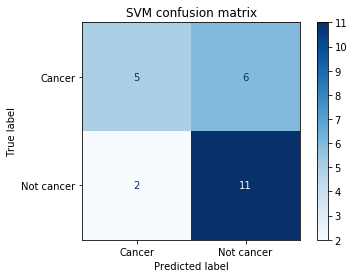

In [88]:
class_names = ["Cancer", "Not cancer"]
title = "SVM confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Using Kernel SVM for classification


In [89]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
ksvm_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
ksvm_acuracy = acuracy.mean()
ksvm_precision_score = precision_score(y_pred, y_testset)
ksvm_recall_score = recall_score(y_pred, y_testset)
ksvm_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [91]:
ksvm_cm

array([[ 6,  5],
       [ 1, 12]])

In [92]:
print(ksvm_cm)
print(ksvm_precision_score)
print(ksvm_recall_score)
print(ksvm_f1_score)

[[ 6  5]
 [ 1 12]]
0.5454545454545454
0.8571428571428571
0.6666666666666665


KSVM confusion matrix
[[ 6  5]
 [ 1 12]]


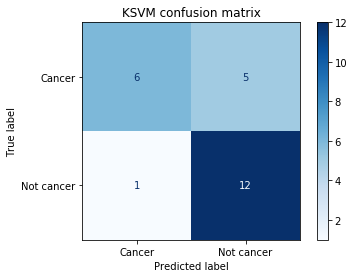

In [93]:
class_names = ["Cancer", "Not cancer"]
title = "KSVM confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Using Naive Bayes for classification

In [94]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:

# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
naive_base_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
naive_bayes_acuracy = acuracy.mean()
naive_bayes_precision_score = precision_score(y_pred, y_testset)
naive_bayes_recall_score = recall_score(y_pred, y_testset)
naive_bayes_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [96]:
naive_base_cm

array([[9, 2],
       [4, 9]])

In [97]:
print(naive_bayes_precision_score)
print(naive_bayes_recall_score)
print(naive_bayes_f1_score)

0.8181818181818182
0.6923076923076923
0.7500000000000001


Naive Bayes confusion matrix
[[9 2]
 [4 9]]


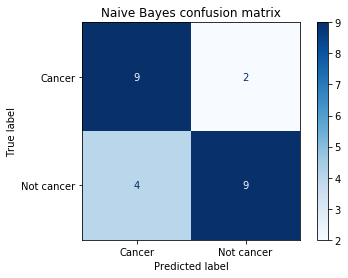

In [98]:
class_names = ["Cancer", "Not cancer"]
title = "Naive Bayes confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Using Decission Tree classification


In [99]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_trainset, y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
tre_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
tree_acuracy = acuracy.mean()
tree_precision_score = precision_score(y_pred, y_testset)
tree_recall_score = recall_score(y_pred, y_testset)
tree_f1_score = f1_score(y_pred, y_testset)

In [101]:
tre_cm

array([[ 8,  3],
       [ 2, 11]])

In [102]:
print(tree_precision_score)
print(tree_recall_score)
print(tree_f1_score)

0.7272727272727273
0.8
0.761904761904762


Decission Tree confusion matrix
[[ 8  3]
 [ 2 11]]


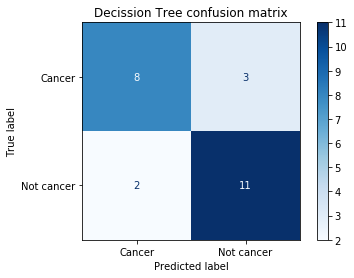

In [103]:
class_names = ["Cancer", "Not cancer"]
title = "Decission Tree confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Using Random Forest Classification

In [104]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [105]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
random_tree_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
random_tree_acuracy = acuracy.mean()
random_tree_precision_score = precision_score(y_pred, y_testset)
random_tree_recall_score = recall_score(y_pred, y_testset)
random_tree_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: Dat

In [106]:
random_tree_cm

array([[ 8,  3],
       [ 2, 11]])

In [107]:
print(random_tree_precision_score)
print(random_tree_recall_score)
print(random_tree_f1_score)

0.7272727272727273
0.8
0.761904761904762


Random Tree confusion matrix
[[ 8  3]
 [ 2 11]]


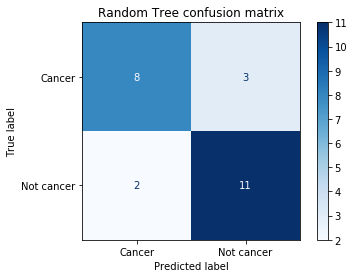

In [108]:
class_names = ["Cancer", "Not cancer"]
title = "Random Tree confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Logistic Regression classification

In [109]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
logistic_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
logistic_acuracy = acuracy.mean()
logistic_precision_score = precision_score(y_pred, y_testset)
logistic_recall_score = recall_score(y_pred, y_testset)
logistic_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [111]:
logistic_cm

array([[ 4,  7],
       [ 2, 11]])

In [112]:
print(logistic_precision_score)
print(logistic_recall_score)
print(logistic_f1_score)

0.36363636363636365
0.6666666666666666
0.4705882352941177


Logistic Regression confusion matrix
[[ 4  7]
 [ 2 11]]


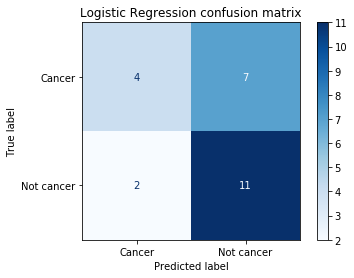

In [113]:
class_names = ["Cancer", "Not cancer"]
title = "Logistic Regression confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# XGBoost classifier

In [114]:
#pip install xgboost


In [115]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_trainset, y_trainset)
y_pred = classifier.predict(X_testset)
xgboost_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
xgboost_acuracy = acuracy.mean()
xgboost_precision_score = precision_score(y_pred, y_testset)
xgboost_recall_score = recall_score(y_pred, y_testset)
xgboost_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [116]:
xgboost_cm

array([[ 7,  4],
       [ 2, 11]])

In [117]:
print(xgboost_precision_score)
print(xgboost_recall_score)
print(xgboost_f1_score)

0.6363636363636364
0.7777777777777778
0.7000000000000001


XGBoost confusion matrix
[[ 7  4]
 [ 2 11]]


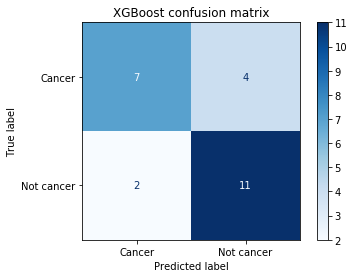

In [118]:
class_names = ["Cancer", "Not cancer"]
title = "XGBoost confusion matrix"
disp = plot_confusion_matrix(classifier, X_testset, y_testset,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

# Output all algorithms acuracy means

In [119]:
print("knn_acuracy: " + str(knn_acuracy) )
print("svm_acuracy: " + str(svm_acuracy) )
print("ksvm_acuracy: " + str(ksvm_acuracy) )
print("naive_bayes_acuracy: " + str(naive_bayes_acuracy) )
print("tree_acuracy: " + str(tree_acuracy) )
print("random_tree_acuracy: " + str(random_tree_acuracy) )
print("logistic_acuracy: " + str(logistic_acuracy) )
print("xgboost_cm: " + str(xgboost_acuracy) )


knn_acuracy: 0.75
svm_acuracy: 0.6988888888888889
ksvm_acuracy: 0.7066666666666667
naive_bayes_acuracy: 0.7266666666666667
tree_acuracy: 0.6866666666666668
random_tree_acuracy: 0.6866666666666666
logistic_acuracy: 0.6777777777777778
xgboost_cm: 0.6966666666666667


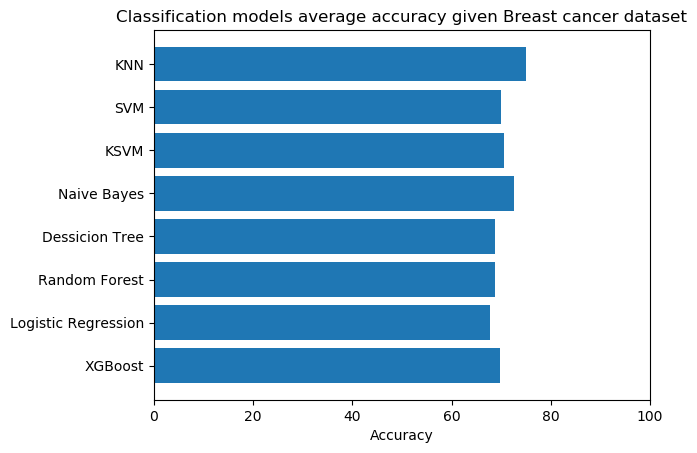

In [121]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
classificators = ("KNN", "SVM", "KSVM", "Naive Bayes", "Dessicion Tree", "Random Forest", "Logistic Regression", "XGBoost")
arr_acuracy = [knn_acuracy * 100, svm_acuracy * 100, ksvm_acuracy * 100, naive_bayes_acuracy * 100, tree_acuracy * 100, random_tree_acuracy * 100, logistic_acuracy * 100, xgboost_acuracy * 100];
y_pos = np.arange(len(classificators))
ax.set_xlim([0,100])
ax.barh(y_pos, arr_acuracy,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classificators)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Classification models average accuracy given Breast cancer dataset')

plt.show()

# Conclussion

As we can see KNN is the best choose for taken preddict Breast cancer with given dataset. If we will have biger dataset of course our prediction precission will be much higher.